<h1><center>Визуализация №1</center></h1>

<h2><center> Зависимость основных показателей от национальности в топ-5 футбольных странах  </center></h2>

### Инструменты

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Датасет

Импорт данных.

In [53]:
df = pd.read_csv("data/CompleteDataset.csv", low_memory=False)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Основные показатели футболиста - общая оценка, зарплата и стоймость.

In [54]:
df = df[["Overall", "Value", "Wage", "Nationality"]]

Посмотрим на значения цены. Как видим их необходимо преобразоать в числовой  вид.

In [55]:
df.Value.unique()

array(['€95.5M', '€105M', '€123M', '€97M', '€61M', '€92M', '€64.5M',
       '€90.5M', '€79M', '€77M', '€52M', '€83M', '€59M', '€67.5M', '€57M',
       '€69.5M', '€66.5M', '€38M', '€4.5M', '€75M', '€70.5M', '€44M',
       '€48M', '€40M', '€60M', '€34M', '€27M', '€36M', '€52.5M', '€65M',
       '€37.5M', '€48.5M', '€29M', '€29.5M', '€56M', '€56.5M', '€44.5M',
       '€47.5M', '€45M', '€40.5M', '€33M', '€46M', '€42.5M', '€43M',
       '€34.5M', '€25.5M', '€41M', '€22.5M', '€13.5M', '€10.5M', '€51.5M',
       '€46.5M', '€42M', '€24.5M', '€39M', '€22M', '€35.5M', '€30M',
       '€30.5M', '€43.5M', '€28.5M', '€25M', '€26M', '€5M', '€32M',
       '€39.5M', '€32.5M', '€31M', '€31.5M', '€35M', '€18.5M', '€28M',
       '€23M', '€21M', '€9M', '€11M', '€41.5M', '€38.5M', '€37M',
       '€27.5M', '€26.5M', '€20M', '€24M', '€0', '€23.5M', '€17.5M',
       '€16.5M', '€14.5M', '€19M', '€17M', '€6M', '€19.5M', '€15.5M',
       '€12.5M', '€3.5M', '€18M', '€21.5M', '€15M', '€20.5M', '€14M',
       '€6.5M

С помощью замены литер *М* и *К* на нули мы получим числовое представление стоймости. Если стоймость имеет ".", отнимем один ноль.

In [56]:
price = df["Value"].str.slice(start = 1)
price = price.str.replace("M", "000000")
price = price.str.replace("K", "000")
price[price.str.contains(".", regex=False)] = \
    price[price.str.contains(".", regex=False)].str.replace(".", "").str.slice(stop=-1)
df["Price"] = price.astype(np.int64)

Аналогичные преобразования для зарплаты, однако здесь требуется меньше действий.

In [57]:
payroll = df['Wage'].str.slice(start = 1)
payroll = payroll.str.replace("K", "000")
df["Payroll"] = payroll.astype(np.int64)

In [58]:
df.drop(["Value", "Wage"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Overall      17981 non-null  int64 
 1   Nationality  17981 non-null  object
 2   Price        17981 non-null  int64 
 3   Payroll      17981 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 562.0+ KB


Страну считаем тем более футбольной, чем больше  у нее представлено футболистов в выборке.

In [59]:
# plt.figure(figsize = (18, 10))
top5 = df["Nationality"].value_counts()[:5].index
top5

Index(['England', 'Germany', 'Spain', 'France', 'Argentina'], dtype='object')

Оставим в сете только представителей этих 5 стран.

In [60]:
df = df[df["Nationality"].isin(top5)]

### Визуализация

Построим 3 графика распределений в зависимости от национальностей. Она позволит ответить на вопрос, в каких странах самые талантливые, ценные и высокооплачиваемые игроки. 

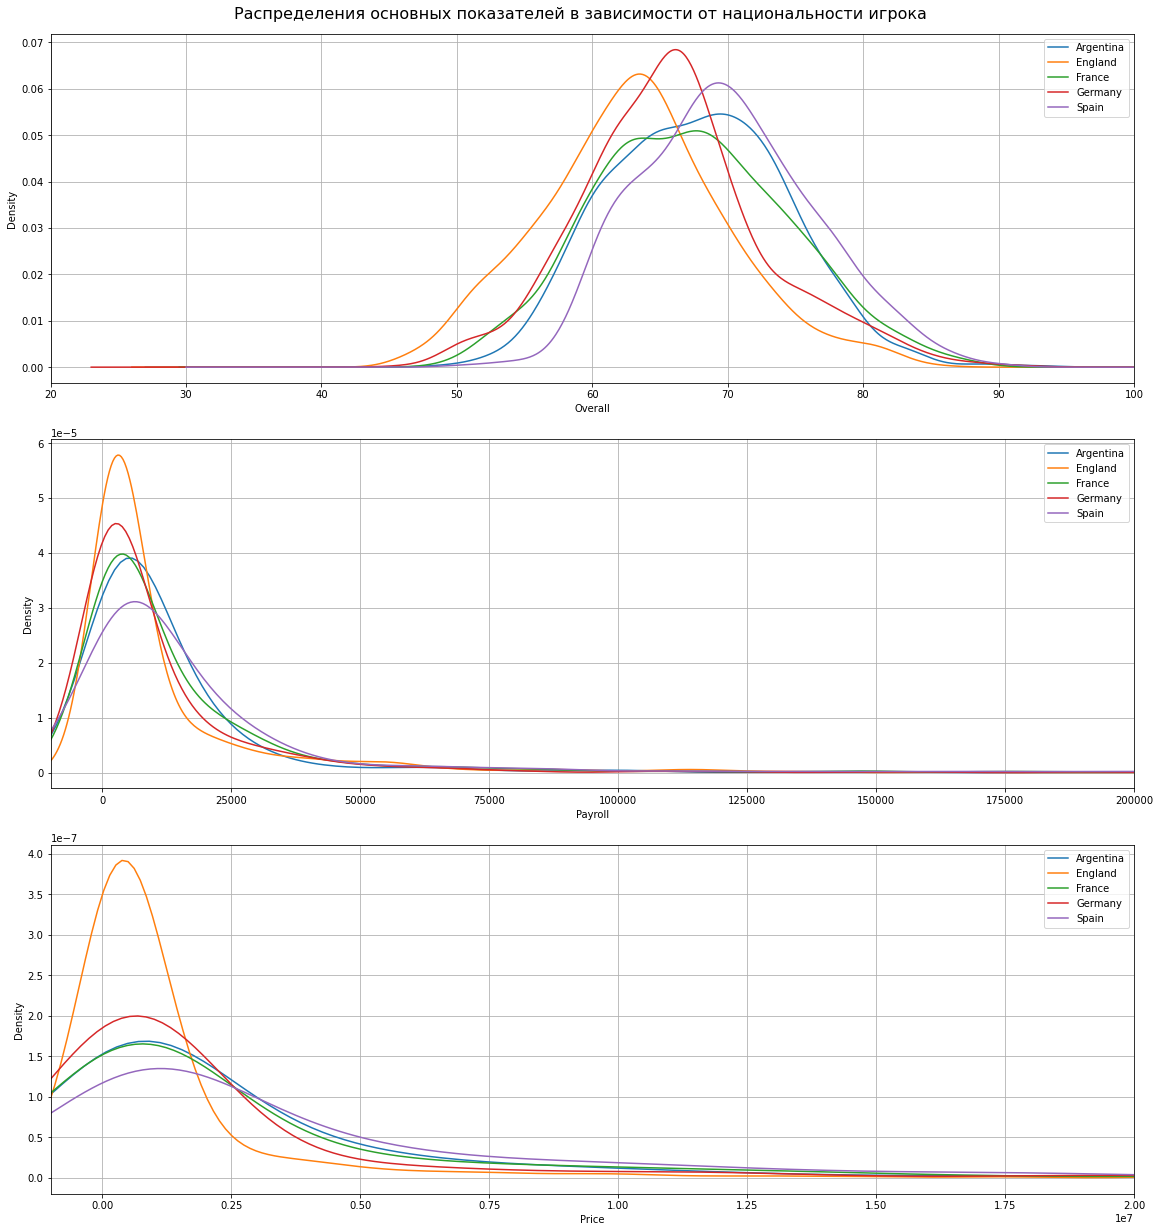

In [61]:
features = ["Overall", "Payroll", "Price"]
lims = [(20, 100), (-10000, 200000), (-1000000, 20000000)]

grouped = df.groupby("Nationality")

fig, axes = plt.subplots(3, 1, figsize=(16, 17), constrained_layout=True)

for i, f in enumerate(features):
    grouped[f].plot.kde(ax = axes[i])
    axes[i].legend()
    axes[i].set_xlim(lims[i])
    axes[i].grid()
    axes[i].set_xlabel(f)
    
fig.suptitle("Распределения основных показателей в зависимости от национальности игрока", fontsize=16)
None

Как видно из графиков, в среднем зарплата и стоймость футболистов слабо зависят от их национальности, однако английские игроки отличаются малым отклонением от среднего, по сравнению с коллегами из других стран. Зато ощутима зависимость оценки качества игроков от их родины, поскольку заметно, что наилучший средний уровень у игроков более теплых стран, а немцы имееют наименее отличную друг от друга оценку.